In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [165]:
file = pd.read_csv('files/fifa21_training.csv')
file.columns.values

array(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Club', 'BP',
       'Position', 'Team & Contract', 'Height', 'Weight', 'foot',
       'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power',
       'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality',
       'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
       'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR',
       'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS'

In [166]:
#Split the information
y = file['OVA']
X = file.drop(['OVA'], axis=1)

In [167]:
#Split again into numerical and categorical.
X_num = X.select_dtypes(include= np.number)
X_cat = X.select_dtypes(include = object)

In [168]:
#We have clasify the importatn values, which are a sum of its subfeatures
X_num_sum = X_num[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping']]
X_num_mean = X_num[['PAC', 'SHO', 'PAS', 'DRI', 'DEF','PHY']]
X_cat1 = X_cat[['Height', 'Weight', 'foot','Value','Wage', 'Release Clause','W/F', 'SM', 'A/W', 'D/W',
       'IR', 'Hits']]

In [169]:
#There are not NaN values.
X_num_sum.isna().sum()

Attacking      0
Skill          0
Movement       0
Power          0
Mentality      0
Defending      0
Goalkeeping    0
dtype: int64

In [170]:
#We are making homogenius al the numbers
X_cat1["Height"] = X_cat1["Height"].replace({"'":"."},regex=True)
X_cat1["Height"] = X_cat1["Height"].replace({'"':''},regex=True)

X_cat1["Weight"] = X_cat1["Weight"].replace({'lbs':""},regex=True)

X_cat1["Value"] = X_cat1["Value"].replace({'€':''},regex=True)
X_cat1["Wage"] = X_cat1["Wage"].replace({'€':''},regex=True)
X_cat1["Release Clause"] = X_cat1["Release Clause"].replace({'€':''},regex=True)

X_cat1["W/F"] = X_cat1["W/F"].replace({'★':""},regex=True)
X_cat1["SM"] = X_cat1["SM"].replace({'★':""},regex=True)
X_cat1["IR"] = X_cat1["IR"].replace({'★':""},regex=True)

X_cat1.head()

<ipython-input-170-d897e86a7bab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat1["Height"] = X_cat1["Height"].replace({"'":"."},regex=True)
<ipython-input-170-d897e86a7bab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat1["Height"] = X_cat1["Height"].replace({'"':''},regex=True)
<ipython-input-170-d897e86a7bab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,Height,Weight,foot,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,5.9,161,Right,525K,4K,801K,4,2,High,Medium,1,3
1,6.0,159,Right,8.5M,23K,0,3,4,High,Low,2,44
2,5.4,134,Right,9M,49K,15.3M,4,4,High,Medium,2,73
3,5.10,152,Right,275K,4K,694K,2,2,Medium,Medium,1,7
4,5.11,150,Right,725K,2K,1.4M,2,3,Low,Medium,1,4


In [171]:
def MK(X):
    if isinstance(X, str):
        if 'K' in X:
          X = X.replace('K','')
          X = float(X)
          X = X*1000
          return X
        elif 'M' in X:
          X = X.replace('M','')
          X = float(X)
          X = X*1000000
          return X
    else:
        if isinstance(X, float):
          return X
X_cat1['Value'] = X_cat1['Value'].apply(MK)

X_cat1['Wage'] = X_cat1['Wage'].apply(MK)

X_cat1['Release Clause'] = X_cat1['Release Clause'].apply(MK)

X_cat1

<ipython-input-171-adac21e6c15c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat1['Value'] = X_cat1['Value'].apply(MK)
<ipython-input-171-adac21e6c15c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat1['Wage'] = X_cat1['Wage'].apply(MK)
<ipython-input-171-adac21e6c15c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,Height,Weight,foot,Value,Wage,Release Clause,W/F,SM,A/W,D/W,IR,Hits
0,5.9,161,Right,525000.0,4000.0,801000.0,4,2,High,Medium,1,3
1,6.0,159,Right,8500000.0,23000.0,NaN,3,4,High,Low,2,44
2,5.4,134,Right,9000000.0,49000.0,15300000.0,4,4,High,Medium,2,73
3,5.10,152,Right,275000.0,4000.0,694000.0,2,2,Medium,Medium,1,7
4,5.11,150,Right,725000.0,2000.0,1400000.0,2,3,Low,Medium,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13695,5.8,143,Left,325000.0,1000.0,731000.0,3,2,High,Medium,1,4
13696,6.5,176,Right,190000.0,NaN,285000.0,2,1,Medium,Medium,1,3
13697,5.7,146,Left,8000000.0,9000.0,12000000.0,4,4,High,Medium,2,15
13698,5.11,176,Right,140000.0,4000.0,245000.0,3,2,Medium,Medium,1,4


In [172]:
#One hot encoder.
encoded = OneHotEncoder().fit(pd.DataFrame(X_cat1['foot'])).transform(pd.DataFrame(X_cat1['foot'])).toarray()
foot_encoded = pd.DataFrame(encoded,columns=['left','right'])


In [173]:
#Label encoder.
X_lab_encoderA = LabelEncoder().fit(X_cat1['A/W']).transform(X_cat1['A/W'])
X_lab_encoderA = pd.DataFrame(X_lab_encoderA, columns=['A/W'])

X_lab_encoderD = LabelEncoder().fit(X_cat1['D/W']).transform(X_cat1['D/W'])
X_lab_encoderD = pd.DataFrame(X_lab_encoderD, columns=['D/W'])

In [174]:
#Columns with we are not able to deal with
X_cat_num = X_cat1.drop(['Value','Wage','Release Clause','Hits','A/W','D/W','foot'], axis=1)

In [175]:
#Cleaning Hits columns
#X_cat2 = X_cat2.drop([212],axis=0)
#X_cat2 = X_cat2.drop([13516],axis=0)
#X_cat2.head()

In [176]:
#Make all the categorical columns numeric.
X_cat_num['Height'] = pd.to_numeric(X_cat_num['Height'])
X_cat_num['Weight'] = pd.to_numeric(X_cat_num['Weight'])
X_cat_num['W/F'] = pd.to_numeric(X_cat_num['W/F'])
X_cat_num['SM'] = pd.to_numeric(X_cat_num['SM'])
X_cat_num['IR'] = pd.to_numeric(X_cat_num['IR'])

In [177]:
X_cat_num = pd.DataFrame(X_cat_num)
X_cat_num.head()

,Height,Weight,W/F,SM,IR
0,5.90,161,4,2,1
1,6.00,159,3,4,2
2,5.40,134,4,4,2
3,5.10,152,2,2,1
4,5.11,150,2,3,1


In [178]:
#Joining numerical and categorical dataframes.
X_con = pd.concat([X_num_sum,X_cat_num,X_lab_encoderA,X_lab_encoderD,foot_encoded], axis=1)
X_con.head()

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Height,Weight,W/F,SM,IR,A/W,D/W,left,right
0,258,286,346,306,290,148,48,5.90,161,4,2,1,0,2,0.0,1.0
1,365,375,404,372,313,77,55,6.00,159,3,4,2,0,1,0.0,1.0
2,336,424,424,308,332,80,21,5.40,134,4,4,2,0,2,0.0,1.0
3,242,259,282,277,257,168,42,5.10,152,2,2,1,2,2,0.0,1.0
4,249,280,324,280,294,185,52,5.11,150,2,3,1,1,2,0.0,1.0


<AxesSubplot:>

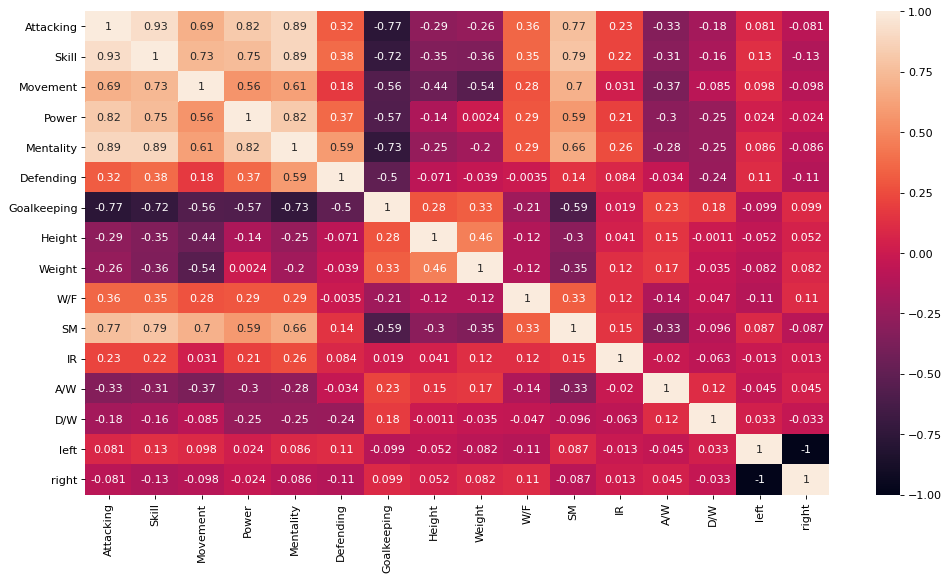

In [179]:
cormat = X_con.corr()
plt.figure(figsize=(15,8), dpi=80)
sns.heatmap(cormat, annot=True)

In [180]:
X_con.describe()

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Height,Weight,W/F,SM,IR,A/W,D/W,left,right
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,258.313431,266.382993,322.597007,302.159343,261.734891,140.876934,78.039343,5.798675,165.642190,2.984234,2.449927,1.149781,1.350292,1.553869,0.246569,0.753431
std,72.412379,77.062358,55.200803,49.586804,63.144215,61.588754,81.789044,0.450179,15.810987,0.675486,0.781784,0.455049,0.917740,0.775531,0.431030,0.431030
min,33.000000,43.000000,113.000000,133.000000,55.000000,17.000000,12.000000,5.100000,117.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,232.000000,294.000000,271.000000,235.000000,83.000000,48.000000,5.110000,154.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,271.000000,279.000000,331.000000,308.000000,270.000000,157.000000,53.000000,5.900000,165.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,306.000000,319.000000,361.000000,339.000000,304.000000,194.000000,59.000000,6.100000,176.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000
max,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,439.000000,6.900000,243.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [181]:

#We are going to delete outlier to check it the matrix gets better values.
#iqr = np.percentile(X_con['Attacking'],75) - np.percentile(X_con['Attacking'],25)
#upper_limit = np.percentile(X_con['Attacking'],75) + 1.5*iqr
#lower_limit = np.percentile(X_con['Attacking'],25) - 1.5*iqr
#X_con = X_con[(X_con['Attacking']>lower_limit) & (X_con['Attacking']<upper_limit)]

#We calculate the mean of the column, excluding the outliers
#lenghtValues=len(X_con[(X_con['Attacking']>lower_limit) & (X_con['Attacking']<upper_limit)])
#lenghtValues

#mean = np.sum(X_con['Attacking'])/lenghtValues
#mean

#Finally, we replace the outliers with the mean of the values that actually within the confidence interval
#def replace_outliers_with_mean(x):
#    if x < lower_limit:
#       return mean
#   elif x > upper_limit:
#       return mean
#   else:
#       return x
#X_con['Attacking'] = list(map(replace_outliers_with_mean,X_con['Attacking']))

In [182]:
X_con.describe()

,Attacking,Skill,Movement,Power,Mentality,Defending,Goalkeeping,Height,Weight,W/F,SM,IR,A/W,D/W,left,right
count,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000,13700.000000
mean,258.313431,266.382993,322.597007,302.159343,261.734891,140.876934,78.039343,5.798675,165.642190,2.984234,2.449927,1.149781,1.350292,1.553869,0.246569,0.753431
std,72.412379,77.062358,55.200803,49.586804,63.144215,61.588754,81.789044,0.450179,15.810987,0.675486,0.781784,0.455049,0.917740,0.775531,0.431030,0.431030
min,33.000000,43.000000,113.000000,133.000000,55.000000,17.000000,12.000000,5.100000,117.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,232.000000,294.000000,271.000000,235.000000,83.000000,48.000000,5.110000,154.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,271.000000,279.000000,331.000000,308.000000,270.000000,157.000000,53.000000,5.900000,165.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,306.000000,319.000000,361.000000,339.000000,304.000000,194.000000,59.000000,6.100000,176.000000,3.000000,3.000000,1.000000,2.000000,2.000000,0.000000,1.000000
max,437.000000,470.000000,464.000000,444.000000,421.000000,272.000000,439.000000,6.900000,243.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [183]:
len(X_con['Attacking'])

13700

In [184]:
X_con.shape

(13700, 16)

In [185]:
#Training model
X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size=0.20, random_state=100)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10960, 16)
(2740, 16)
(10960,)
(2740,)


In [186]:
model = linear_model.LinearRegression().fit(X_train,y_train)

print(model.intercept_)
print(model.coef_)

-0.8245234898727176
[ 6.46728224e-02  1.21973307e-03  2.89067109e-02  2.32768329e-02
  2.35931512e-03  4.45381040e-02  8.65070524e-02  1.05602520e+00
  5.48280935e-02  1.06222600e-01  1.01263895e+00  2.60607807e+00
  2.18787781e-02 -1.71364589e-01 -3.99587075e-03  3.99587075e-03]


In [187]:
predictions = model.predict(X_test)

In [188]:
r2 = r2_score(y_test, predictions)
r2

0.7573695702616141

In [189]:
mse = mean_squared_error(y_test, predictions)
print(mse)

11.234686657917116


In [190]:
rmse = math.sqrt(mse)
print(rmse)

3.351818410641769


In [193]:
import pickle
pickle.dump(model,open('model.p','wb'))